In [ ]:
'''
import zipfile

with zipfile.ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as a_zip:
    a_zip.extractall('')
'''

In [39]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [40]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [41]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [42]:
submission = pd.DataFrame(columns=['Id','SalePrice'])
submission['Id']=test.pop('Id')
submission.head(3)

,Id,SalePrice
0,1461,NaN
1,1462,NaN
2,1463,NaN


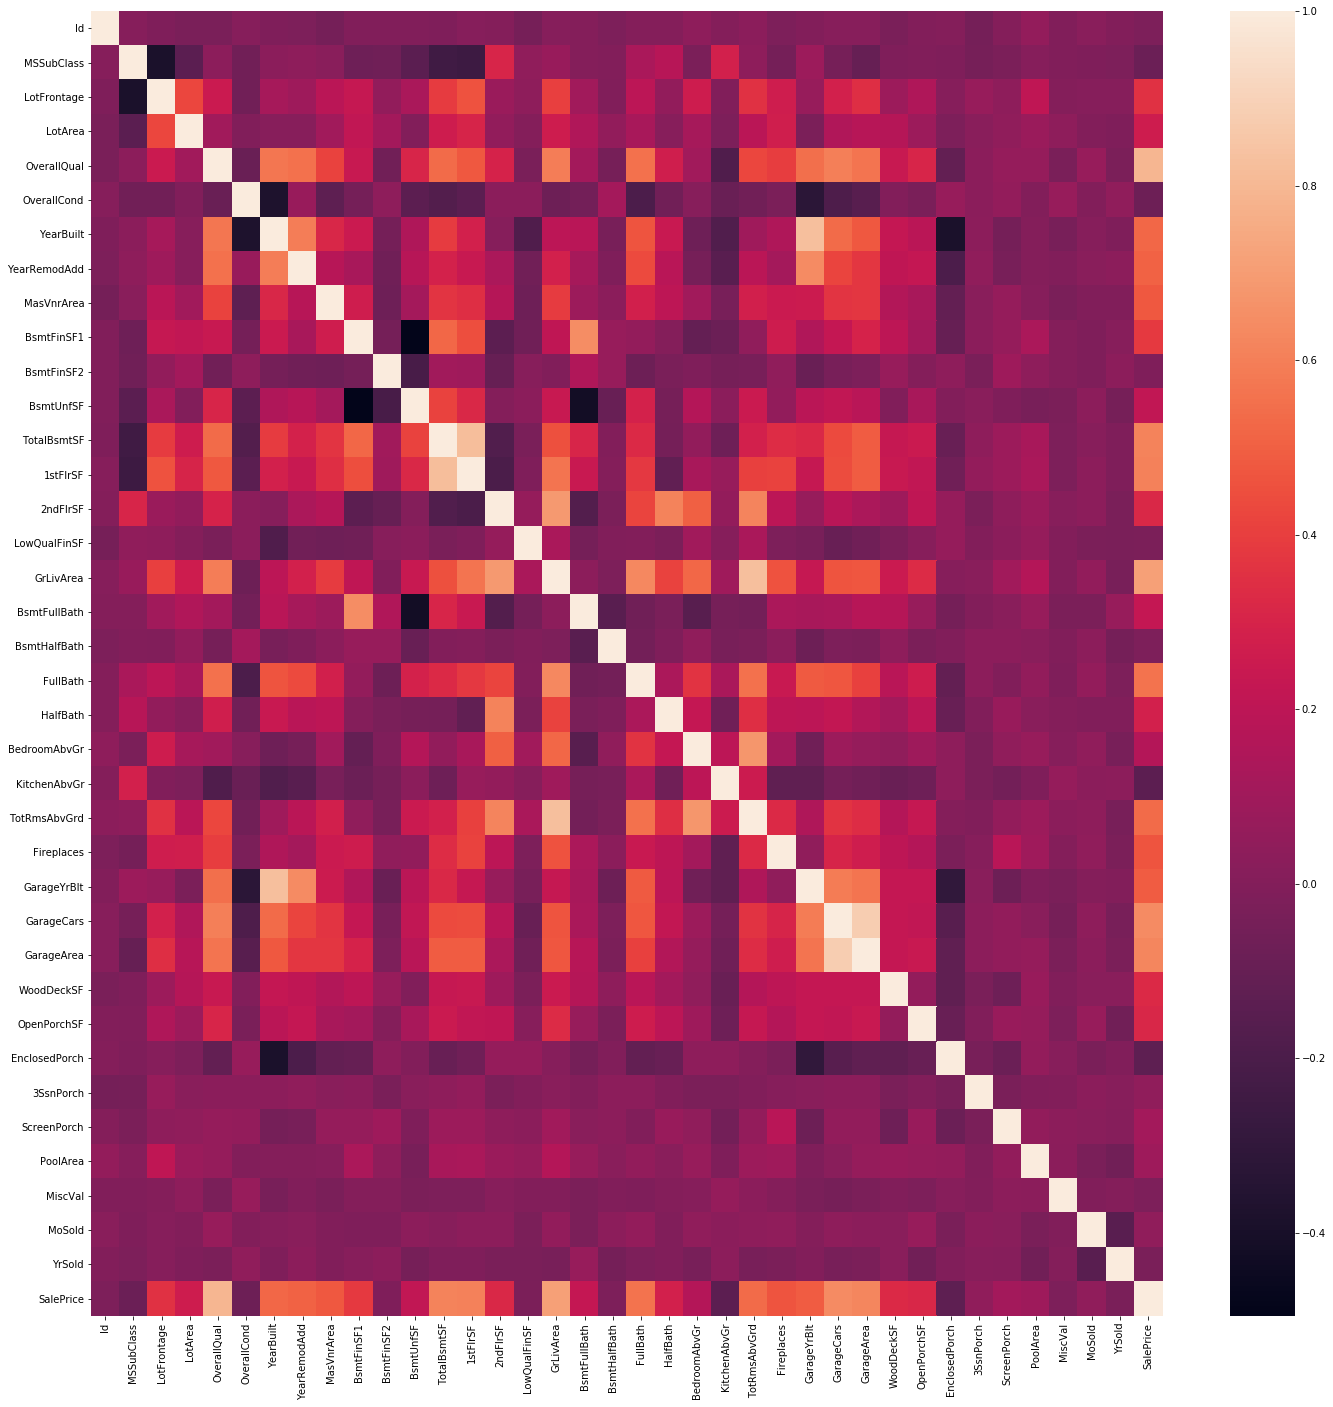

In [43]:
import seaborn as sn
import matplotlib.pyplot as plt

#sns.pairplot(df)

plt.figure(figsize=(24,24))
sn.heatmap(train.corr()) # , annot = True
plt.show()

In [44]:
import numpy as np
# set string values to number
def str_2_num(df):
    non_numerical=pd.DataFrame()
    full_label={}
    for col in df.columns:
        if df[col].dtype == 'O':
            df[col].fillna(0)
            label=dict(zip(df[col].unique(),np.arange(len(df[col].unique()))))
            full_label[col]=label
            df[col]=[label[x] for x in df[col]]
            
    return df, full_label
train, label=str_2_num(train)
test, test_label=str_2_num(test)
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,9,2008,0,0,223500


In [45]:
label['Neighborhood']

{'CollgCr': 0,
 'Veenker': 1,
 'Crawfor': 2,
 'NoRidge': 3,
 'Mitchel': 4,
 'Somerst': 5,
 'NWAmes': 6,
 'OldTown': 7,
 'BrkSide': 8,
 'Sawyer': 9,
 'NridgHt': 10,
 'NAmes': 11,
 'SawyerW': 12,
 'IDOTRR': 13,
 'MeadowV': 14,
 'Edwards': 15,
 'Timber': 16,
 'Gilbert': 17,
 'StoneBr': 18,
 'ClearCr': 19,
 'NPkVill': 20,
 'Blmngtn': 21,
 'BrDale': 22,
 'SWISU': 23,
 'Blueste': 24}

In [47]:
for element in label['Neighborhood']:
    print(element)

CollgCr
Veenker
Crawfor
NoRidge
Mitchel
Somerst
NWAmes
OldTown
BrkSide
Sawyer
NridgHt
NAmes
SawyerW
IDOTRR
MeadowV
Edwards
Timber
Gilbert
StoneBr
ClearCr
NPkVill
Blmngtn
BrDale
SWISU
Blueste


In [48]:
import urllib.request, urllib.parse, urllib.error
import json
import ssl

In [49]:
def get_location(api_key, address):
    # If you have a Google Places API key, enter it here
    # api_key = 'AIzaSy___IDByT70'
    # https://developers.google.com/maps/documentation/geocoding/intro

    if api_key is False:
        api_key = 42
        serviceurl = 'http://py4e-data.dr-chuck.net/json?'
    else :
        serviceurl = 'https://maps.googleapis.com/maps/api/geocode/json?'

    # Ignore SSL certificate errors
    ctx = ssl.create_default_context()
    ctx.check_hostname = False
    ctx.verify_mode = ssl.CERT_NONE

    

    parms = dict()
    parms['address'] = address
    if api_key is not False: parms['key'] = api_key
    url = serviceurl + urllib.parse.urlencode(parms)

    print('Retrieving', url)
    uh = urllib.request.urlopen(url, context=ctx)
    data = uh.read().decode()
    print('Retrieved', len(data), 'characters')

    try:
        js = json.loads(data)
    except:
        js = None

    if not js or 'status' not in js or js['status'] != 'OK':
        print('==== Failure To Retrieve ====')
        print(data)
        

    #print(json.dumps(js, indent=4))

    lat = js['results'][0]['geometry']['location']['lat']
    lng = js['results'][0]['geometry']['location']['lng']
    
    return (lat, lng)
    

In [50]:
from haversine import haversine, Unit
address = {
       'Blmngtn':'Bloomington Heights',
       'Blueste':'Bluestem',
       'BrDale':'Briardale',
       'BrkSide':'Brookside',
       'ClearCr':'Clear Creek',
       'CollgCr':'College Creek',
       'Crawfor':'Crawford',
       'Edwards':'Edwards',
       'Gilbert':'Gilbert',
       'IDOTRR':'Iowa DOT and Rail Road',
       'MeadowV':'Meadow Village',
       'Mitchel':'Mitchell',
       'Names':'North Ames',
       'NoRidge':'Northridge',
       'NPkVill':'Northpark Villa',
       'NridgHt':'Northridge Heights',
       'NWAmes':'Northwest Ames',
       'OldTown':'Old Town',
       'SWISU':'South & West of Iowa State University',
       'Sawyer':'Sawyer',
       'SawyerW':'Sawyer West',
       'Somerst':'Somerset',
       'StoneBr':'Stone Brook',
       'Timber':'Timberland',
       'Veenker':'Veenker',
}

In [51]:
for element in address:
    print(address[element])

Bloomington Heights
Bluestem
Briardale
Brookside
Clear Creek
College Creek
Crawford
Edwards
Gilbert
Iowa DOT and Rail Road
Meadow Village
Mitchell
North Ames
Northridge
Northpark Villa
Northridge Heights
Northwest Ames
Old Town
South & West of Iowa State University
Sawyer
Sawyer West
Somerset
Stone Brook
Timberland
Veenker


In [52]:
'''
center_point = (42.0236715,-93.6161489)

def get_dist(center_point, address):
    coord = {}
    dist = {}
    for element in address:
        coord[element] = get_location(False, address[element]+", Ames"+", Iowa,"+", US")
        dist[element]= haversine(center_point, coord[element])
    return coord, dist

address_coord, address_center_dist = get_dist(center_point, address)
'''

Retrieving http://py4e-data.dr-chuck.net/json?address=Bloomington+Heights%2C+Ames%2C+Iowa%2C%2C+US&key=42
Retrieved 4458 characters
Retrieving http://py4e-data.dr-chuck.net/json?address=Bluestem%2C+Ames%2C+Iowa%2C%2C+US&key=42
Retrieved 2274 characters
Retrieving http://py4e-data.dr-chuck.net/json?address=Briardale%2C+Ames%2C+Iowa%2C%2C+US&key=42
Retrieved 2250 characters
Retrieving http://py4e-data.dr-chuck.net/json?address=Brookside%2C+Ames%2C+Iowa%2C%2C+US&key=42
Retrieved 2512 characters
Retrieving http://py4e-data.dr-chuck.net/json?address=Clear+Creek%2C+Ames%2C+Iowa%2C%2C+US&key=42
Retrieved 2423 characters
Retrieving http://py4e-data.dr-chuck.net/json?address=College+Creek%2C+Ames%2C+Iowa%2C%2C+US&key=42
Retrieved 2124 characters
Retrieving http://py4e-data.dr-chuck.net/json?address=Crawford%2C+Ames%2C+Iowa%2C%2C+US&key=42
Retrieved 2245 characters
Retrieving http://py4e-data.dr-chuck.net/json?address=Edwards%2C+Ames%2C+Iowa%2C%2C+US&key=42
Retrieved 4532 characters
Retrieving h

In [56]:
#pd.to_pickle(address_coord, 'address_coord')
#pd.to_pickle(address_center_dist, 'address_center_dist')

In [56]:
address_coord = pd.pickle_load('address_coord')
address_center_dist = pd.pickle_load('address_center_dist')

In [80]:
list_label_neighbor = list(label['Neighborhood'])
print(  list_label_neighbor[train['Neighborhood'][0]]    )

CollgCr


In [82]:
def calc_house_rank(df, label):
    df['house_rank']=0
    df['c_dist']= 0
    list_label_neighbor = list(label['Neighborhood'])
    for index, row in df.iterrows():
        try:
            c_dist = round(address_center_dist[list_label_neighbor[int(row['Neighborhood'])]],3)
        except:
            c_dist = 0
        
        
        rank=0
        rank+=2-row['Street']
        #=============================================
        rank+=-2+row['Alley']
        #=============================================
        rank+=3-row['LotShape']
        #=============================================
        rank+=2-row['Utilities']
        #=============================================
        if row['ExterQual']==label['ExterQual']['Ex']:
            rank+=3
        if row['ExterQual']==label['ExterQual']['Gd']:
            rank+=2
        if row['ExterQual']==label['ExterQual']['TA']:
            rank+=1
        if row['ExterQual']==label['ExterQual']['Fa']:
            rank+=0
        #=============================================
        if row['KitchenQual']==label['KitchenQual']['Ex']:
            rank+=3
        if row['KitchenQual']==label['KitchenQual']['Gd']:
            rank+=2
        if row['KitchenQual']==label['KitchenQual']['TA']:
            rank+=1
        if row['KitchenQual']==label['KitchenQual']['Fa']:
            rank+=0
        #=============================================
        if row['ExterCond']==label['ExterCond']['Ex']:
            rank+=4
        if row['ExterCond']==label['ExterCond']['Gd']:
            rank+=3
        if row['ExterCond']==label['ExterCond']['TA']:
            rank+=2
        if row['ExterCond']==label['ExterCond']['Fa']:
            rank+=1
        if row['ExterCond']==label['ExterCond']['Po']:
            rank+=0
        #=============================================
        if row['BsmtQual']==label['BsmtQual']['Ex']:
            rank+=3
        if row['BsmtQual']==label['BsmtQual']['Gd']:
            rank+=2
        if row['BsmtQual']==label['BsmtQual']['TA']:
            rank+=1
        if row['BsmtQual']==label['BsmtQual']['Fa']:
            rank+=0
        #=============================================
        
        if row['BsmtCond']==label['BsmtCond']['Gd']:
            rank+=2
        if row['BsmtCond']==label['BsmtCond']['TA']:
            rank+=1
        if row['BsmtCond']==label['BsmtCond']['Fa']:
            rank+=0
        #=============================================
        if row['BsmtFinType1']==label['BsmtFinType1']['GLQ']:
            rank+=5
        if row['BsmtFinType1']==label['BsmtFinType1']['ALQ']:
            rank+=4
        if row['BsmtFinType1']==label['BsmtFinType1']['BLQ']:
            rank+=3
        if row['BsmtFinType1']==label['BsmtFinType1']['Rec']:
            rank+=2
        if row['BsmtFinType1']==label['BsmtFinType1']['LwQ']:
            rank+=1
        if row['BsmtFinType1']==label['BsmtFinType1']['Unf']:
            rank+=0
        #=============================================
        if row['HeatingQC']==label['HeatingQC']['Ex']:
            rank+=4
        if row['HeatingQC']==label['HeatingQC']['Gd']:
            rank+=3
        if row['HeatingQC']==label['HeatingQC']['TA']:
            rank+=2
        if row['HeatingQC']==label['HeatingQC']['Fa']:
            rank+=1
        if row['HeatingQC']==label['HeatingQC']['Po']:
            rank+=0
        #=============================================
        if row['CentralAir']==label['CentralAir']['Y']:
            rank+=1
        if row['CentralAir']==label['CentralAir']['N']:
            rank+=0
        #=============================================
        if row['FireplaceQu']==label['FireplaceQu']['Ex']:
            rank+=5
        if row['FireplaceQu']==label['FireplaceQu']['Gd']:
            rank+=4
        if row['FireplaceQu']==label['FireplaceQu']['TA']:
            rank+=3
        if row['FireplaceQu']==label['FireplaceQu']['Fa']:
            rank+=2
        if row['FireplaceQu']==label['FireplaceQu']['Po']:
            rank+=1
        #=============================================
        if row['GarageFinish']==label['GarageFinish']['Fin']:
            rank+=3
        if row['GarageFinish']==label['GarageFinish']['RFn']:
            rank+=2
        if row['GarageFinish']==label['GarageFinish']['Unf']:
            rank+=1
        #=============================================
        try:
            if row['GarageQual']==label['GarageQual']['Ex']:
                rank+=5
            if row['GarageQual']==label['GarageQual']['Gd']:
                rank+=4
            if row['GarageQual']==label['GarageQual']['TA']:
                rank+=3
            if row['GarageQual']==label['GarageQual']['Fa']:
                rank+=2
            if row['GarageQual']==label['GarageQual']['Po']:
                rank+=1
        except:
            if row['GarageQual']==label['GarageQual']['Gd']:
                rank+=4
            if row['GarageQual']==label['GarageQual']['TA']:
                rank+=3
            if row['GarageQual']==label['GarageQual']['Fa']:
                rank+=2
            if row['GarageQual']==label['GarageQual']['Po']:
                rank+=1
        #=============================================
        try:
            if row['GarageCond']==label['GarageQual']['Ex']:
                rank+=5
            if row['GarageCond']==label['GarageQual']['Gd']:
                rank+=4
            if row['GarageCond']==label['GarageQual']['TA']:
                rank+=3
            if row['GarageCond']==label['GarageQual']['Fa']:
                rank+=2
            if row['GarageCond']==label['GarageQual']['Po']:
                rank+=1
        except:
            if row['GarageCond']==label['GarageQual']['Gd']:
                rank+=4
            if row['GarageCond']==label['GarageQual']['TA']:
                rank+=3
            if row['GarageCond']==label['GarageQual']['Fa']:
                rank+=2
            if row['GarageCond']==label['GarageQual']['Po']:
                rank+=1
        #=============================================
        try:
            if row['PoolQC']==label['PoolQC']['Ex']:
                rank+=5
            if row['PoolQC']==label['PoolQC']['Gd']:
                rank+=4
            if row['PoolQC']==label['PoolQC']['Fa']:
                rank+=2
        except:
            if row['PoolQC']==label['PoolQC']['Ex']:
                rank+=5
            if row['PoolQC']==label['PoolQC']['Gd']:
                rank+=4
        
        #=============================================
        try:
            if row['MiscFeature']==label['MiscFeature']['Shed']:
                rank+=2
            if row['MiscFeature']==label['MiscFeature']['Gar2']:
                rank+=2
            if row['MiscFeature']==label['MiscFeature']['Othr']:
                rank+=2
            if row['MiscFeature']==label['MiscFeature']['TenC']:
                rank+=2
        except:
            if row['MiscFeature']==label['MiscFeature']['Shed']:
                rank+=2
            if row['MiscFeature']==label['MiscFeature']['Gar2']:
                rank+=2
            if row['MiscFeature']==label['MiscFeature']['Othr']:
                rank+=2
        
        df.iloc[index,-2]=rank
        df.iloc[index, -1]=c_dist
calc_house_rank(train, label)
calc_house_rank(test, test_label)
train.head(3)

TypeError: list indices must be integers or slices, not str

In [91]:
train['total_internal_area']=train['1stFlrSF']+train['2ndFlrSF']+train['GarageArea']+train['GarageArea']

In [90]:
test['total_internal_area']=test['1stFlrSF']+test['2ndFlrSF']+test['GarageArea']+test['GarageArea']

In [86]:
train.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house_rank,c_dist
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,2,2008,0,0,208500,32.0,2.926
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,5,2007,0,0,181500,32.0,3.435
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,9,2008,0,0,223500,34.0,2.926
3,4,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,2,2006,0,1,140000,31.0,0.888
4,5,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,12,2008,0,0,250000,34.0,3.688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,62.0,7917,0,0,0,0,0,...,0,0,0,8,2007,0,0,175000,28.0,9.662
1456,1457,20,0,85.0,13175,0,0,0,0,0,...,1,0,0,2,2010,0,0,210000,29.0,1.523
1457,1458,70,0,66.0,9042,0,0,0,0,0,...,3,1,2500,5,2010,0,0,266500,40.0,0.888
1458,1459,20,0,68.0,9717,0,0,0,0,0,...,0,0,0,4,2010,0,0,142125,28.0,0.000


In [87]:
label['Neighborhood']

{'CollgCr': 0,
 'Veenker': 1,
 'Crawfor': 2,
 'NoRidge': 3,
 'Mitchel': 4,
 'Somerst': 5,
 'NWAmes': 6,
 'OldTown': 7,
 'BrkSide': 8,
 'Sawyer': 9,
 'NridgHt': 10,
 'NAmes': 11,
 'SawyerW': 12,
 'IDOTRR': 13,
 'MeadowV': 14,
 'Edwards': 15,
 'Timber': 16,
 'Gilbert': 17,
 'StoneBr': 18,
 'ClearCr': 19,
 'NPkVill': 20,
 'Blmngtn': 21,
 'BrDale': 22,
 'SWISU': 23,
 'Blueste': 24}

In [88]:
import urllib.request, urllib.parse, urllib.error
import json
import ssl

In [137]:
features_list=['OverallQual','OverallCond', 'c_dist','house_rank','total_internal_area','PoolArea','MSZoning','Neighborhood','SalePrice']
train=train[features_list]
#test=test[features_list[:-1]]

In [138]:
train.columns

Index(['OverallQual', 'OverallCond', 'c_dist', 'house_rank',
       'total_internal_area', 'PoolArea', 'MSZoning', 'Neighborhood',
       'SalePrice'],
      dtype='object')

In [139]:
test.head(3)

AttributeError: 'list' object has no attribute 'head'

In [140]:
import sys
print(sys.float_info.max)

1.7976931348623157e+308


In [141]:
test.replace([np.inf, -np.inf], 0)
test.fillna(0)
test.head(3)

AttributeError: 'list' object has no attribute 'replace'

In [142]:
train.replace([np.inf, -np.inf], 0)
train.fillna(0)
train.head(3)

,OverallQual,OverallCond,c_dist,house_rank,total_internal_area,PoolArea,MSZoning,Neighborhood,SalePrice
0,7,5,2.926,32.0,2806,0,0,0,208500
1,6,8,3.435,32.0,2182,0,0,1,181500
2,7,5,2.926,34.0,3002,0,0,0,223500


In [143]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train.iloc[:,:-1], train.iloc[:,-1], test_size=0.33, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(978, 8) (482, 8) (978,) (482,)


In [144]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_val = scaler.transform(X_val)
#test= scaler.transform(test)

In [145]:
import tensorflow as tf

In [146]:
from tensorflow import keras
METRICS = [
    tf.keras.metrics.MeanSquaredLogarithmicError(
    name='mean_squared_logarithmic_error', dtype=None
    )
]

In [147]:
output_bias = y_train.mean()
output_bias = tf.keras.initializers.Constant(output_bias)

model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(X_train[0].shape)),
    tf.keras.layers.LayerNormalization(),
    #tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(16,kernel_regularizer=tf.keras.regularizers.L1(0.002),activity_regularizer=tf.keras.regularizers.L2(0.02)),
    tf.keras.layers.Dense(1, use_bias=True, bias_initializer=output_bias)
])

In [148]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(lr=1e-2),
      loss='mae',
      metrics=METRICS)

In [149]:
%%time
MAX_EPOCHS=600
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS,batch_size=72, validation_data=(X_val, y_val),verbose=2,shuffle=False, )

Epoch 1/600

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

14/14 - 0s - loss: 56415.6484 - mean_squared_logarithmic_error: 0.1601 - val_loss: 59590.8945 - val_mean_squared_logarithmic_error: 0.1787
Epoch 2/600
14/14 - 0s - loss: 56414.6055 - mean_squared_logarithmic_error: 0.1601 - val_loss: 59589.6836 - val_mean_squared_logarithmic_error: 0.1787
Epoch 3/600
14/14 - 0s - loss: 56413.2734 - mean_squared_logarithmic_error: 0.1601 - val_loss: 59587.7500 - val_mean_squared_logarithmic_error: 0.1787
Epoch 4/600
14/14 - 0s - loss: 56411.4180 - mean_square

In [127]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(8,kernel_regularizer=tf.keras.regularizers.L1(0.004),activity_regularizer=tf.keras.regularizers.L2(0.04)),
    tf.keras.layers.Dense(1),
])
optimizer = tf.keras.optimizers.Adam(lr=1e-2)
model.compile(loss='mae', optimizer=optimizer,metrics=['mse'])

In [128]:
output_bias = y_val.mean()
output_bias = tf.keras.initializers.Constant(output_bias)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

In [129]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mae',
            optimizer=optimizer,
            metrics=['mse'])

In [130]:
%%time
MAX_EPOCHS=1000
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS, batch_size=72, validation_data=(X_val, y_val),verbose=2,shuffle=False)

Epoch 1/1000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

14/14 - 0s - loss: 180022.6562 - mse: 38170312704.0000 - val_loss: 178769.5625 - val_mse: 39225262080.0000
Epoch 2/1000
14/14 - 0s - loss: 178489.0156 - mse: 37582348288.0000 - val_loss: 177407.7500 - val_mse: 38698004480.0000
Epoch 3/1000
14/14 - 0s - loss: 177112.6875 - mse: 37059698688.0000 - val_loss: 176037.9688 - val_mse: 38171594752.0000
Epoch 4/1000
14/14 - 0s - loss: 175693.6719 - mse: 36525166592.0000 - val_loss: 174597.0312 - val_mse: 37621981184.0000
Epoch 5/1000
14/14 - 0s - lo

In [150]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_val, y_val)

0.7663150183791387

In [151]:
reg.coef_

array([19166.55590028,   692.89718835,  1176.28040849,  3476.98177781,
          37.15110971,  -140.81266889, -5367.03422756,  -271.17241191])

In [152]:
reg.intercept_

-129118.97201913968

In [153]:
predict = reg.predict(X_val)

In [154]:
for i in range(len(predict)):
    if predict[i] < 0:
        predict[i]= predict[i]*-1

In [155]:
from sklearn.metrics import mean_squared_log_error
print(np.sqrt(mean_squared_log_error(y_val, predict)))

0.21152348679181965


In [1]:
import xgboost as xgb

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.013, random_state=0)

xgb_model.fit(X_train, y_train, verbose=True)

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_val)

print('MAE:', mean_absolute_error(y_val, xgb_preds))

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.metrics import mean_squared_log_error
print(np.sqrt(mean_squared_log_error(y_val, xgb_preds)))

In [ ]:
hp_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=4,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)


hp_model.fit(X_train, y_train, verbose=True)

hp_preds = hp_model.predict(X_val)

print('MAE:', mean_absolute_error(y_val, hp_preds))

In [ ]:
from sklearn.metrics import mean_squared_log_error
print(np.sqrt(mean_squared_log_error(y_val, hp_preds)))

In [ ]:
np.any(np.isnan(test))

In [ ]:
from numpy import *
where_are_NaNs = isnan(test)
test[where_are_NaNs] = 0

In [ ]:
np.all(np.isfinite(test))

In [ ]:
test_predict=reg.predict(test)
submission['SalePrice']=test_predict

In [ ]:
submission

In [ ]:
submission.to_csv('submission.csv', index=False)